In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
#Displaying static image https://plotly.com/python/orca-management/
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

<h3>Data Preparation & Wrangling</h3>

In [4]:
df = datasets.load_iris() #also from here px.data.iris()

<b>df</b> is a .json dataset containing data about features, target, features names, target names, etc. Our task is to read data into .json format and make a dataframe of it so that it will become more readible. Print **df** data into another cell if you want to look inside it. 

In [5]:
temp = pd.DataFrame(df['data'],columns = df['feature_names'])
temp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
temp['target'] = df['target']
temp.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
24,4.8,3.4,1.9,0.2,0
144,6.7,3.3,5.7,2.5,2
61,5.9,3.0,4.2,1.5,1
97,6.2,2.9,4.3,1.3,1
85,6.0,3.4,4.5,1.6,1


In [7]:
df['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
temp['target_names'] = temp['target']
temp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [9]:
for i in range(3):
    temp['target_names'] = temp['target_names'].replace({i:df['target_names'][i]})
temp.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
23,5.1,3.3,1.7,0.5,0,setosa
143,6.8,3.2,5.9,2.3,2,virginica
55,5.7,2.8,4.5,1.3,1,versicolor
133,6.3,2.8,5.1,1.5,2,virginica
15,5.7,4.4,1.5,0.4,0,setosa
127,6.1,3.0,4.9,1.8,2,virginica
0,5.1,3.5,1.4,0.2,0,setosa
130,7.4,2.8,6.1,1.9,2,virginica
141,6.9,3.1,5.1,2.3,2,virginica
35,5.0,3.2,1.2,0.2,0,setosa


<h3>PCA</h3>

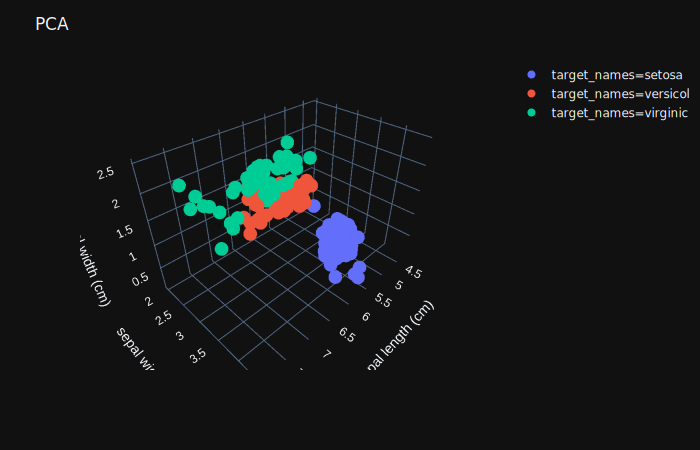

In [10]:
fig = px.scatter_3d(temp, x='sepal length (cm)', y='sepal width (cm)', 
                    z='petal width (cm)',color='target_names')
fig.update_layout(template = 'plotly_dark',
                  title = 'PCA')
fig.show()
fig.show('svg') #only for static image

<h3>Clustering using KMeans Clustering Algo.</h3>

<h4>1. Finding the optimum number of clusters</h4>

In [11]:
ss = list() #sum of squared distances of samples from nearest center within cluster
for i in range(1, 13):
    model = KMeans(n_clusters = i,
                   init = 'k-means++', #default = "k-means++", another = 'random'
                   max_iter = 300, #default = 300 
                   n_init = 15, #default = 10, algo. run with d/f centroids 
                   random_state = 15)
    model.fit(temp.drop(['target','target_names'],axis=1))
    ss.append(model.inertia_)

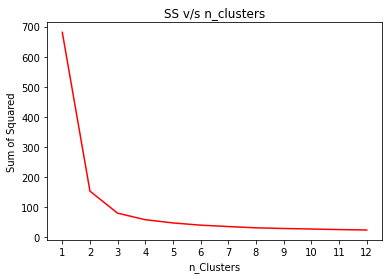

In [ ]:
plt.plot(list(range(1, 13)), ss,color = 'r')
plt.title('SS v/s n_clusters')
plt.xlabel('n_Clusters')
plt.ylabel('Sum of Squared') 
plt.xticks(list(range(1,13)))
plt.show()

As per our observation, **n = 3** is the optimum number of clusters using elbow method

<h4>2. Model building & Prediction</h4>

In [ ]:
Model = KMeans(n_clusters = 3,
               init = 'k-means++', #default = "k-means++", another = 'random'
               max_iter = 300, #default = 300 
               n_init = 15, #default = 10, algo. run with d/f centroids 
               random_state = 15)
Prediction = Model.fit(temp.drop(['target','target_names'],axis=1))

<h4>3. Attributes</h4>

In [ ]:
Model.cluster_centers_ #cluster center coordinates

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
Model.labels_ #Labels of each sample

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
Model.inertia_ #Sum of Squared distances of samples to closest cluster center

78.85144142614601

In [ ]:
Model.n_iter_ #no. of iterations run

4

<h4>4. Visualizing predicted Cluster Centers</h4>

In [ ]:
x = list()
y = list()
z = list()
arr = Model.cluster_centers_
for i in range(3):
    x.append(arr[i][0])
    y.append(arr[i][1])
    z.append(arr[i][3])
x,y,z

([5.006, 5.901612903225806, 6.85],
 [3.428, 2.7483870967741937, 3.0736842105263156],
 [0.24600000000000055, 1.4338709677419355, 2.0710526315789473])

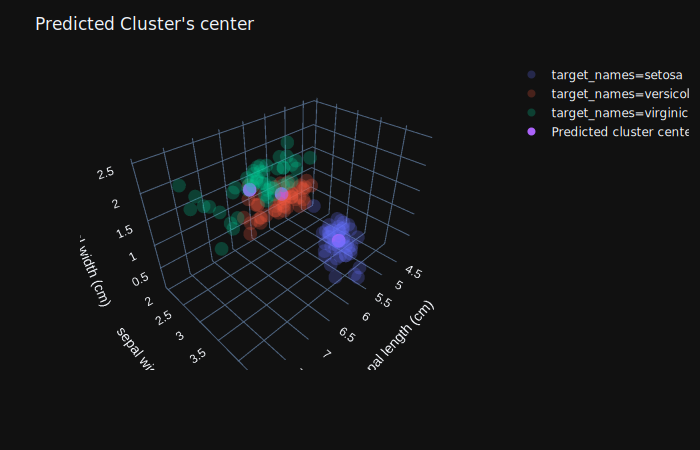

In [ ]:
fig = px.scatter_3d(temp, x='sepal length (cm)', y='sepal width (cm)', 
                    z='petal width (cm)',color='target_names',opacity = 0.25)
fig.update_layout(template = 'plotly_dark',
                  title = 'Predicted Cluster\'s center')
fig.add_scatter3d(x = x, y = y, z = z,name = 'Predicted cluster center',
                  mode = 'markers',opacity = 1)
fig.show()
fig.show('svg') #only for static image

Thank you!😋